In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
X , y = make_blobs(n_samples=1000 , n_features=3 , centers=3 , random_state=42)

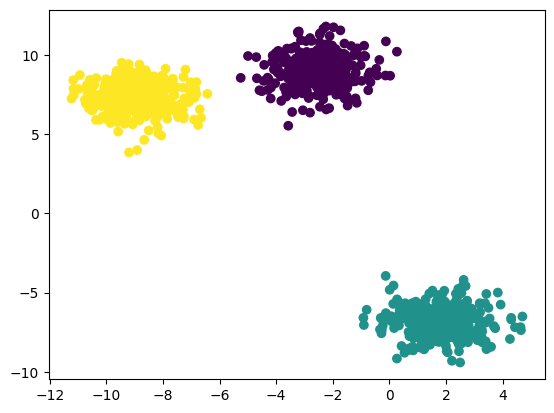

In [11]:
plt.scatter(X[: , 0] , X[: , 1] , c=y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.33 , random_state=42)

In [14]:
from sklearn.cluster import KMeans

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
wcss=[]
for k in range(1 , 11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[64532.46969736763,
 7854.351463115013,
 2001.205278602795,
 1810.1331856054026,
 1654.0249302026964,
 1500.6550268447834,
 1385.6004553034752,
 1291.4265132647038,
 1181.5203279541774,
 1109.5688649333133]

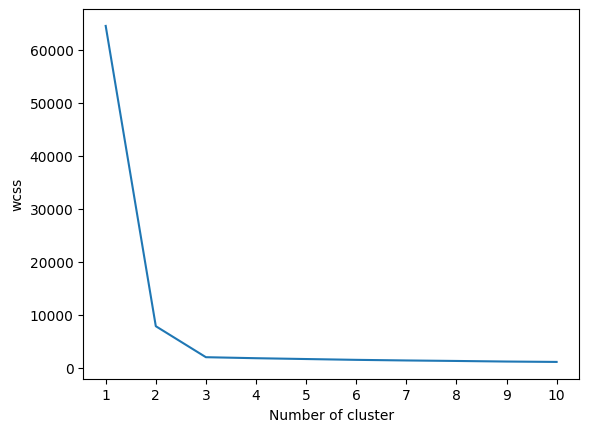

In [22]:
plt.plot(range(1 , 11) , wcss)
plt.xticks(range(1 , 11))
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

In [23]:
kmeans=KMeans(n_clusters=3  , init='k-means++')

In [26]:
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [28]:
y_labels=kmeans.predict(X_train)

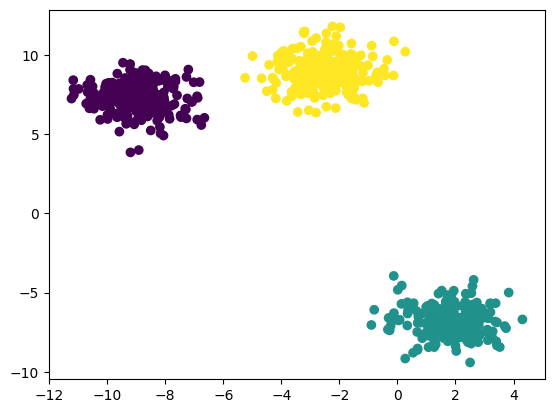

In [29]:
plt.scatter(X_train[: , 0], X_train[: , 1] , c=y_labels)

In [30]:
!pip install kneed


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from kneed import KneeLocator

In [32]:
k1=KneeLocator(range(1 , 11) , wcss , curve='convex' , direction='decreasing')
k1.elbow

2

In [33]:
## Silhoutte score

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_train_scaled=std.fit_transform(X_train)
X_test_scaled=std.transform(X_test)

In [40]:
silhouette_coeff=[]
for k in range(2 , 11):
    kmeans=KMeans(n_clusters=k , init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled , kmeans.labels_)
    silhouette_coeff.append(score)

In [41]:
silhouette_coeff

[0.7638744315991143,
 0.7724181949179699,
 0.6060630991747464,
 0.4542523849203256,
 0.2548652774497248,
 0.2558098860682403,
 0.26655937436813937,
 0.2732485475553379,
 0.2694056219231893]

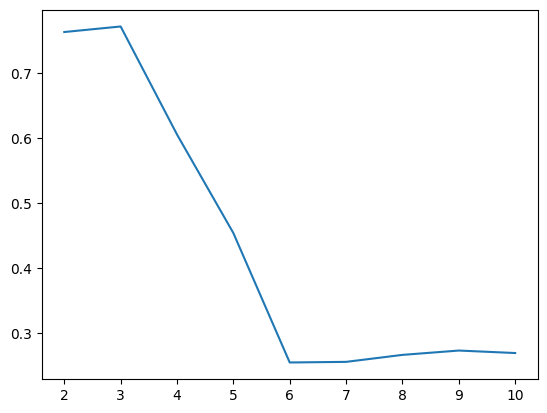

In [42]:
plt.plot(range(2 , 11) , silhouette_coeff)